In [1]:
import gymnasium as gym
import numpy as np

`nv = gym.make('Taxi-v3', render_mode='ansi')`:

- `gym.make('Taxi-v3')`: Esta función crea una instancia del entorno **Taxi-v3**, que es un entorno de aprendizaje por refuerzo en el que el agente controla un taxi que debe recoger y dejar a un pasajero en una cuadrícula.

- `render_mode='ansi'`: Este argumento indica que el entorno debe renderizarse en **modo texto** (ANSI) en lugar de gráficos visuales. En este caso, la salida se muestra como texto, que puedes imprimir en la consola para ver el estado del entorno sin necesidad de una interfaz gráfica.

In [2]:
env = gym.make('Taxi-v3', render_mode='ansi')
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<TaxiEnv<Taxi-v3>>>>>

- `episodes = 500`: Cada episodio representa una secuencia de pasos donde el agente intenta completar su tarea.

- `alpha = 0.618`: Establece la **tasa de aprendizaje**. Este parámetro controla cuánto impacto tiene una nueva información sobre el valor Q existente. Un valor más alto hace que el agente aprenda más rápido de las recompensas recientes.

- `Q = np.zeros([env.observation_space.n, env.action_space.n])`:
  - Crea una **tabla Q inicializada en ceros**, de tamaño `[número de estados, número de acciones]`.
  - `env.observation_space.n` da el **número de posibles estados** en el entorno, y `env.action_space.n` proporciona el **número de acciones posibles**.
  - Esta tabla Q almacenará las **estimaciones de recompensa esperada** para cada combinación de estado y acción.

- `rewards_per_episode = []`: Inicializa una **lista vacía** para registrar la **recompensa total** obtenida en cada episodio. Esto permite hacer un seguimiento del desempeño del agente a lo largo del tiempo.

In [3]:
# Inicialización del entorno y parámetros
episodes = 500  # Número total de episodios de entrenamiento
alpha = 0.618  # Tasa de aprendizaje
Q = np.zeros([env.observation_space.n, env.action_space.n])  # Tabla Q inicializada en ceros
# Lista para almacenar las recompensas totales por episodio
rewards_per_episode = []

# AGENTE GREEDY

**Agente greedy** porque, en cada paso, el agente elige la acción con el valor Q más alto en el estado actual. Esto significa que siempre selecciona la mejor acción conocida según su tabla Q, sin explorar otras opciones. Este comportamiento se describe como "greedy" porque el agente prioriza la **explotación de acciones que ya parecen óptimas**, sin realizar exploración adicional.

### Explicación de cada línea del código:

- `for episode in range(1, episodes + 1)`: Inicia el **bucle de entrenamiento**, repitiendo el proceso para cada episodio.

- `done = False, truncated = False`: Inicializa las variables `done` y `truncated` para controlar si el episodio ha terminado.

- `G, reward = 0, 0`: Inicializa `G` (recompensa total del episodio) y `reward` en 0.

- `state, _ = env.reset()`: Reinicia el entorno y obtiene el **estado inicial** para el nuevo episodio.

- `pasos = 0`: Inicializa el contador de **pasos del episodio actual** en 0.

### Bucle de Pasos en el Episodio
- `while reward != 20 and not truncated`: Ejecuta el bucle de pasos hasta que se obtenga una **recompensa de 20** (indicando el objetivo completado) o el episodio sea truncado.

- `action = np.argmax(Q[state])`: Selecciona la **acción con el valor Q más alto** en el estado actual, lo que implementa una **política greedy** (sin exploración).

- `state2, reward, done, truncated, info = env.step(action)`: Ejecuta la acción en el entorno y obtiene:

  - `state2`: Nuevo **estado** después de realizar la acción.
  - `reward`: **Recompensa** obtenida por realizar la acción.
  - `done`: Indica si se ha **completado el episodio**.
  - `truncated`: Indica si el **episodio fue truncado** por alguna razón (límite de tiempo, etc.).

- `Q[state, action] += alpha * (reward + np.max(Q[state2]) - Q[state, action])`: Actualiza el valor Q para el **par estado-acción**:

  - Calcula el **valor Q nuevo** usando la recompensa obtenida y el valor Q del mejor estado siguiente (`np.max(Q[state2])`).
  - La tasa de aprendizaje `alpha` controla cuánto afecta esta actualización a `Q[state, action]`.

- `G += reward`: Acumula la **recompensa obtenida** en `G` para el total del episodio.

- `state = state2`: Actualiza `state` al nuevo estado (`state2`) para el próximo paso.

- `pasos += 1`: Incrementa el **contador de pasos**.

### Después del Bucle de Pasos
- `rewards_per_episode.append(G)`: Guarda la **recompensa total obtenida en el episodio** (`G`) en la lista `rewards_per_episode`.

- `if episode % 100 == 0: print(f"Recompensa total en el episodio {episode}: {G}")`: Imprime la **recompensa total** cada 100 episodios para monitorear el progreso del agente.


In [4]:
for episode in range(1, episodes + 1):
    done = False
    truncated = False
    G, reward = 0, 0
    state, _ = env.reset()
    pasos = 0
    # Bucle de pasos para el episodio actual
    while reward != 20 and not truncated:
        # Elige la acción con el valor Q más alto (política greedy)
        action = np.argmax(Q[state])
        
        # Ejecuta la acción en el entorno y observa el nuevo estado y recompensa
        state2, reward, done, truncated, info = env.step(action)
        
        # Actualiza el valor Q usando la fórmula de Q-learning (sin exploración)
        Q[state, action] += alpha * (reward + np.max(Q[state2]) - Q[state, action])
        
        # Acumula la recompensa y actualiza el estado actual
        G += reward
        state = state2
        pasos += 1
    # Almacenar la recompensa total del episodio
    rewards_per_episode.append(G)
    # Imprimir la recompensa total en episodios específicos (100, 200, 300, etc.)
    if episode % 100 == 0:
        print(f"Recompensa total en el episodio {episode}: {G}")


Recompensa total en el episodio 100: -128
Recompensa total en el episodio 200: -17
Recompensa total en el episodio 300: 11
Recompensa total en el episodio 400: -1
Recompensa total en el episodio 500: 9


### Conclusión del Comportamiento del Agente Greedy

El **agente greedy** ha logrado mejorar su desempeño inicial a lo largo del tiempo, pero podría estar **atrapado en una solución subóptima**. Al seleccionar siempre la acción con el mayor valor Q en cada estado, el agente no explora nuevas posibilidades y se enfoca en explotar la mejor estrategia que ha aprendido. Esto puede llevar a que no encuentre la **estrategia óptima** si su política inicial tenía algunos valores de Q incorrectos.

La **estabilización alrededor de cero** indica que el agente ha aprendido a completar el objetivo de manera más eficiente, aunque con algunos episodios en los que acumula ligeras penalizaciones, probablemente debido a **pequeñas variaciones en el entorno** o **decisiones subóptimas** en ciertos estados.

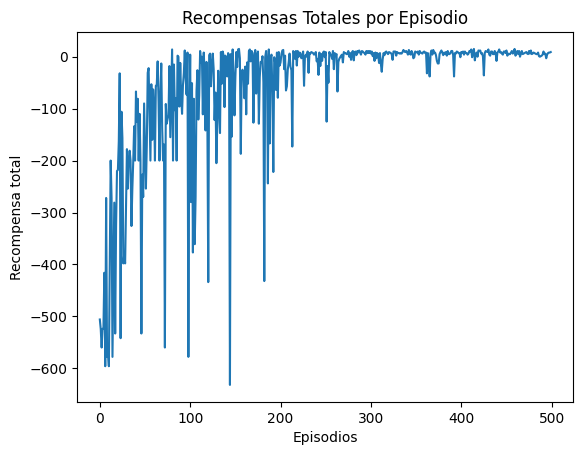

In [5]:
import matplotlib.pyplot as plt
# Graficar las recompensas acumuladas por episodio
plt.plot(rewards_per_episode)
plt.xlabel('Episodios')
plt.ylabel('Recompensa total')
plt.title('Recompensas Totales por Episodio')
plt.show()


In [6]:
print(pasos)
print(reward)

12
20


In [7]:
def decode_taxi_state(state):
    # Obtener el destino usando el módulo 4
    destination = state % 4
    state //= 4
    
    # Obtener la ubicación del pasajero usando el módulo 5
    passenger_location = state % 5
    state //= 5
    
    # Obtener la columna del taxi usando el módulo 5
    taxi_col = state % 5
    state //= 5
    
    # El valor restante es la fila del taxi
    taxi_row = state
    
    return {
        "taxi_row": taxi_row,
        "taxi_col": taxi_col,
        "passenger_location": passenger_location,
        "destination": destination
    }

In [8]:
listaEstados = []
done = False
truncated = False
G, reward = 0,0
state, _ = env.reset()
firstState = state
pasos = 0
listaEstados.append(state)
print("First State: ", firstState)
while reward != 20 and truncated != True:
        action = np.argmax(Q[state]) #1
        state2, reward, done, truncated, info = env.step(action) #2
        pasos += 1
        # Q[state,action] += alpha * (reward + np.max(Q[state2]) - Q[state,action]) #3
        print('State: ', state)
        print('pasos: ', pasos)
        G += reward
        state = state2  
        listaEstados.append(state) 

First State:  347
State:  347
pasos:  1
State:  247
pasos:  2
State:  147
pasos:  3
State:  167
pasos:  4
State:  67
pasos:  5
State:  87
pasos:  6
State:  99
pasos:  7
State:  79
pasos:  8
State:  179
pasos:  9
State:  279
pasos:  10
State:  379
pasos:  11
State:  479
pasos:  12


In [9]:
for estado in listaEstados:
    env.reset()
    env.unwrapped.s = estado
    decoded_state = decode_taxi_state(estado)
    print(decoded_state)  
    print(env.render())

{'taxi_row': 3, 'taxi_col': 2, 'passenger_location': 1, 'destination': 3}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 2, 'taxi_col': 2, 'passenger_location': 1, 'destination': 3}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 1, 'taxi_col': 2, 'passenger_location': 1, 'destination': 3}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 1, 'taxi_col': 3, 'passenger_location': 1, 'destination': 3}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 0, 'taxi_col': 3, 'passenger_location': 1, 'destination': 3}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 0, 'taxi_col': 4, 'passenger_location': 1, 'destination': 3}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 0, 'taxi_col': 4, 'passenge

# EPSILON GREEDY
- `episodes = 500`: Define el **número total de episodios** en el entrenamiento, lo cual determina cuántas veces el agente intentará completar la tarea en el entorno.

- `alpha = 0.618`: Establece la **tasa de aprendizaje**. Este parámetro controla cuánto afecta una nueva información (recompensa obtenida y valor futuro esperado) al valor Q actual. Un valor más alto permite que el agente **aprenda más rápidamente** de las recompensas recientes.

- `epsilon = 1.0`: Inicializa el valor de **epsilon**, que representa la **probabilidad de exploración** (seleccionar una acción aleatoria) en lugar de explotación (elegir la acción con el mayor valor Q conocido). Un epsilon alto al inicio fomenta la **exploración**.

- `epsilon_decay = 0.995`: Define el **factor de decaimiento de epsilon**. Después de cada episodio, epsilon se multiplica por este valor, **reduciendo gradualmente la probabilidad de exploración**. Esto permite que el agente explore al inicio y, con el tiempo, se concentre en explotar las mejores acciones conocidas.

- `min_epsilon = 0.01`: Especifica el **valor mínimo de epsilon**. Esto garantiza que el agente no deje de explorar por completo. Incluso después de mucho entrenamiento, siempre existe una pequeña probabilidad de que explore, lo cual puede ser útil para **evitar soluciones subóptimas**.

- `Q = np.zeros([env.observation_space.n, env.action_space.n])`: Inicializa la **tabla Q con ceros**, donde:

  - `env.observation_space.n` representa el **número de estados** en el entorno.
  - `env.action_space.n` representa el **número de acciones** posibles en cada estado.

  Esta tabla se usa para almacenar el **valor Q estimado** de cada par estado-acción, lo que ayuda al agente a decidir la **acción óptima**.


In [10]:
episodes = 1000  # Número total de episodios de entrenamiento
alpha = 0.618  # Tasa de aprendizaje
epsilon = 1.0  # Valor inicial de epsilon para exploración
epsilon_decay = 0.995  # Factor de decaimiento de epsilon
min_epsilon = 0.01  # Valor mínimo de epsilon
Q = np.zeros([env.observation_space.n, env.action_space.n])  # Tabla Q inicializada en ceros

### Bucle de Entrenamiento

- `for episode in range(1, episodes + 1)`: Inicia el **bucle de entrenamiento**, ejecutando el proceso de aprendizaje para cada episodio hasta completar el número total (`episodes`).

- `done = False, truncated = False`: Inicializa los **indicadores de finalización** (`done`) y **truncamiento** (`truncated`) del episodio en `False`. Estos se actualizarán cuando el episodio termine.

- `G, reward = 0, 0`: Inicializa `G` (la **recompensa acumulada** del episodio) y `reward` (la **recompensa de cada paso**) en 0.

- `state, _ = env.reset()`: Reinicia el entorno y obtiene el **estado inicial** del episodio.

- `pasos = 0`: Inicializa el **contador de pasos** en 0 para llevar el registro de cuántos movimientos hace el agente en el episodio actual.

### Bucle de Pasos en el Episodio

- `while reward != 20 and not truncated`: Ejecuta el bucle de pasos hasta que se alcance una **recompensa de 20** (indicando éxito) o el episodio sea **truncado**.

- `if np.random.rand() < epsilon`: Aquí se decide si el agente **explorará o explotará**:
  - Si el valor aleatorio generado es menor que `epsilon`, el agente explora seleccionando una acción aleatoria.

  - `action = env.action_space.sample()`: Cuando explora, el agente selecciona una **acción al azar** usando `env.action_space.sample()`.

- `else: action = np.argmax(Q[state])`: Si el valor aleatorio es mayor que `epsilon`, el agente **explota** eligiendo la **acción con el valor Q más alto** en el estado actual (`np.argmax(Q[state])`), siguiendo su política actual.

- `state2, reward, done, truncated, info = env.step(action)`: Ejecuta la acción seleccionada y obtiene:
  - `state2`: El **nuevo estado** tras la acción.
  - `reward`: La **recompensa obtenida**.
  - `done`: Indica si el **objetivo ha sido alcanzado**.
  - `truncated`: Indica si el episodio fue **truncado** por otras razones.
  - `info`: Información adicional del entorno (no se usa aquí).

- `reward = reward + 1`: Suma 1 a la recompensa para el paso actual.

- `Q[state, action] += alpha * (reward + np.max(Q[state2]) - Q[state, action])`: Actualiza el **valor Q** para el par estado-acción:
  - La actualización se basa en la **fórmula de Q-learning**, utilizando la recompensa obtenida (`reward`) y el valor Q máximo en el estado siguiente (`np.max(Q[state2])`).
  - `alpha` controla cuánto afecta esta actualización al valor Q actual.

- `G += reward`: Acumula la **recompensa obtenida** en `G` para el total del episodio.

- `state = state2`: Actualiza `state` al **nuevo estado** (`state2`) para el próximo paso.

- `pasos += 1`: Incrementa el **contador de pasos** en 1.

### Finalización del Episodio

- `rewards_per_episode.append(G)`: Al final del episodio, añade la **recompensa total acumulada** (`G`) a la lista `rewards_per_episode`.

- `epsilon = max(min_epsilon, epsilon * epsilon_decay)`: Reduce `epsilon` de forma gradual, multiplicándolo por `epsilon_decay`. Esto disminuye la **probabilidad de exploración** a lo largo del tiempo. El valor se mantiene por encima de `min_epsilon` para asegurar que siempre haya una pequeña probabilidad de explorar.


In [11]:
# Lista para almacenar las recompensas totales por episodio
rewards_per_episode = []

for episode in range(1, episodes + 1):
    done = False
    truncated = False
    G, reward = 0, 0
    state, _ = env.reset()
    pasos = 0

    # Bucle de pasos para el episodio actual
    while reward != 20 and not truncated:
        # Decisión epsilon-greedy: exploración o explotación
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Exploración: elige una acción aleatoria
        else:
            action = np.argmax(Q[state])  # Explotación: elige la mejor acción conocida
        
        # Ejecuta la acción en el entorno y observa el nuevo estado y recompensa
        state2, reward, done, truncated, info = env.step(action)
        
        # Actualiza el valor Q usando la fórmula de Q-learning
        Q[state, action] += alpha * (reward + np.max(Q[state2]) - Q[state, action])
        
        # Acumula la recompensa y actualiza el estado actual
        G += reward
        state = state2
        pasos += 1

    # Almacenar la recompensa total del episodio
    rewards_per_episode.append(G)

    # Reducir epsilon gradualmente hasta un valor mínimo (epsilon decay)
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Imprimir la recompensa total y el valor de epsilon en cada episodio
    print(f"Episodio {episode}: Recompensa total = {G}, Epsilon = {epsilon:.4f}")


Episodio 1: Recompensa total = -803, Epsilon = 0.9950
Episodio 2: Recompensa total = -749, Epsilon = 0.9900
Episodio 3: Recompensa total = -758, Epsilon = 0.9851
Episodio 4: Recompensa total = -659, Epsilon = 0.9801
Episodio 5: Recompensa total = -677, Epsilon = 0.9752
Episodio 6: Recompensa total = -776, Epsilon = 0.9704
Episodio 7: Recompensa total = -803, Epsilon = 0.9655
Episodio 8: Recompensa total = -884, Epsilon = 0.9607
Episodio 9: Recompensa total = -632, Epsilon = 0.9559
Episodio 10: Recompensa total = -794, Epsilon = 0.9511
Episodio 11: Recompensa total = -821, Epsilon = 0.9464
Episodio 12: Recompensa total = -812, Epsilon = 0.9416
Episodio 13: Recompensa total = -740, Epsilon = 0.9369
Episodio 14: Recompensa total = -902, Epsilon = 0.9322
Episodio 15: Recompensa total = -668, Epsilon = 0.9276
Episodio 16: Recompensa total = -767, Epsilon = 0.9229
Episodio 17: Recompensa total = -662, Epsilon = 0.9183
Episodio 18: Recompensa total = -767, Epsilon = 0.9137
Episodio 19: Recomp

### Tendencia de la Gráfica:

1. **Al inicio (episodios bajos)**: La **recompensa total es muy negativa**, con grandes variaciones hacia abajo. Esto es característico de un agente que aún está **explorando** y tomando decisiones subóptimas. El alto valor inicial de `epsilon` (1.0) hace que el agente explore mucho, **tomando acciones aleatorias** y, como resultado, acumulando penalizaciones.

2. **A medida que avanzan los episodios**: Se observa una **mejora en la recompensa total** por episodio, con menos variaciones extremas y una **tendencia hacia valores más cercanos a cero**. Esto indica que el agente está comenzando a **explotar más sus mejores acciones** conocidas (gracias a la disminución de `epsilon`), tomando decisiones más eficientes y acumulando menos penalizaciones.

3. **En episodios avanzados (a partir de ~300)**: La **recompensa total se estabiliza** alrededor de valores cercanos a cero, con menos picos negativos. Esto muestra que el agente ha aprendido una **política estable y eficiente** para resolver el entorno. Sin embargo, debido al valor mínimo de `epsilon` (0.01), ocasionalmente sigue explorando, lo cual le permite **ajustar su política** y evitar quedarse atrapado en una solución subóptima.

### Comparación con un Agente Greedy Puro

En comparación con un **agente greedy puro** (sin exploración), el **agente epsilon-greedy**:

- **Explora más al principio**, lo que le permite probar diferentes acciones y **descubrir mejores estrategias** en los primeros episodios.
- **Converge a una política estable** más rápidamente, ya que el decaimiento de `epsilon` reduce gradualmente la exploración y permite al agente explotar las mejores acciones.
- **Evita quedarse atrapado en soluciones subóptimas** gracias al pequeño valor de exploración que se mantiene en `min_epsilon`, permitiendo ocasionalmente probar otras acciones.

### Conclusión

La gráfica muestra que el **agente epsilon-greedy mejora su desempeño** a lo largo del tiempo, con una tendencia a **estabilizarse cerca de cero**. Esto indica que ha aprendido a completar la tarea de manera más eficiente y con menos penalización, beneficiándose del **equilibrio entre exploración y explotación** proporcionado por la estrategia epsilon-greedy.


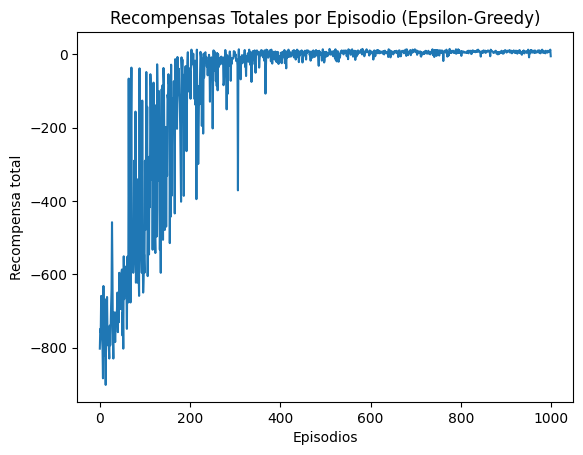

In [12]:
# Graficar las recompensas acumuladas por episodio
plt.plot(rewards_per_episode)
plt.xlabel('Episodios')
plt.ylabel('Recompensa total')
plt.title('Recompensas Totales por Episodio (Epsilon-Greedy)')
plt.show()

In [13]:
listaEstados = []
done = False
truncated = False
G, reward = 0,0
state, _ = env.reset()
firstState = state
pasos = 0
listaEstados.append(state)
print("First State: ", firstState)
while reward != 20 and truncated != True:
        action = np.argmax(Q[state]) #1
        state2, reward, done, truncated, info = env.step(action) #2
        pasos += 1
        # Q[state,action] += alpha * (reward + np.max(Q[state2]) - Q[state,action]) #3
        print('State: ', state)
        print('pasos: ', pasos)
        G += reward
        state = state2  
        listaEstados.append(state) 

First State:  287
State:  287
pasos:  1
State:  187
pasos:  2
State:  87
pasos:  3
State:  99
pasos:  4
State:  199
pasos:  5
State:  299
pasos:  6
State:  279
pasos:  7
State:  379
pasos:  8
State:  479
pasos:  9


In [14]:
for estado in listaEstados:
    env.reset()
    env.unwrapped.s = estado
    decoded_state = decode_taxi_state(estado)
    print(decoded_state)  
    print(env.render())

{'taxi_row': 2, 'taxi_col': 4, 'passenger_location': 1, 'destination': 3}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 1, 'taxi_col': 4, 'passenger_location': 1, 'destination': 3}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 0, 'taxi_col': 4, 'passenger_location': 1, 'destination': 3}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 0, 'taxi_col': 4, 'passenger_location': 4, 'destination': 3}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 1, 'taxi_col': 4, 'passenger_location': 4, 'destination': 3}
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 2, 'taxi_col': 4, 'passenger_location': 4, 'destination': 3}
+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 2, 'taxi_col': 3, 'passenge

# VALORES INICIALES OPTIMAS

### Parámetros del Agente

- **episodes = 500**: Define el **número total de episodios en el entrenamiento**, es decir, cuántas veces el agente intentará completar la tarea.
  
- **alpha = 0.618**: Establece la **tasa de aprendizaje**. Este parámetro controla cuánto impacto tiene la **nueva información** sobre el valor Q existente. Un valor más alto permite que el agente aprenda más rápidamente de las **recompensas recientes**.

- **epsilon = 1.0**: Inicializa el valor de `epsilon` en 1.0, lo cual representa la **probabilidad inicial de que el agente explore** (escoja una acción aleatoria). Esto **fomenta la exploración** al inicio del entrenamiento.

- **epsilon_decay = 0.995**: Define el **factor de decaimiento de `epsilon`**. Después de cada episodio, `epsilon` se multiplica por este valor, **reduciendo gradualmente la probabilidad de exploración**. Esto permite que el agente explore al principio y luego se enfoque en explotar las **mejores acciones conocidas**.

- **min_epsilon = 0.01**: Establece un **valor mínimo de `epsilon`**. Esto asegura que el agente no deje de explorar por completo y que siempre exista una **pequeña probabilidad de elegir una acción aleatoria**, lo cual ayuda a evitar quedarse atrapado en una **solución subóptima**.

- **Q = np.ones([env.observation_space.n, env.action_space.n])**: 

  - Inicializa la **tabla Q con valores de 1** en lugar de 0, de tamaño `[número de estados, número de acciones]`.
  - `env.observation_space.n` representa el **número de estados** en el entorno.
  - `env.action_space.n` representa el **número de acciones posibles en cada estado**.

### Importancia de la Inicialización con Valores Optimistas (Q = np.ones(...))

Inicializar la tabla Q con valores de 1 es una técnica conocida como **valores iniciales optimistas**. Al asignar un valor alto (mayor que 0) a todas las acciones, el agente percibe que cualquier acción podría tener una recompensa potencial alta. Esto incentiva la **exploración temprana**, ya que el agente intentará probar diferentes acciones en cada estado para confirmar si realmente pueden producir recompensas altas.

#### Esta estrategia es útil en el aprendizaje por refuerzo porque:

- **Incentiva la exploración temprana**: El agente probará diferentes acciones porque los valores Q iniciales sugieren que todas las acciones son buenas.
  
- **Reduce el riesgo de converger a una política subóptima**: Al explorar más al principio, el agente tiene más oportunidades de **descubrir las mejores acciones** posibles en cada estado.


In [15]:
episodes = 1000  # Número total de episodios de entrenamiento
alpha = 0.618  # Tasa de aprendizaje
epsilon = 1.0  # Valor inicial de epsilon para exploración
epsilon_decay = 0.995  # Factor de decaimiento de epsilon
min_epsilon = 0.01  # Valor mínimo de epsilon
Q = np.ones([env.observation_space.n, env.action_space.n])  # Tabla Q inicializada en ceros

In [16]:
# Lista para almacenar las recompensas totales por episodio
rewards_per_episode = []

for episode in range(1, episodes + 1):
    done = False
    truncated = False
    G, reward = 0, 0
    state, _ = env.reset()
    pasos = 0

    # Bucle de pasos para el episodio actual
    while reward != 20 and not truncated:
        # Decisión epsilon-greedy: exploración o explotación
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Exploración: elige una acción aleatoria
        else:
            action = np.argmax(Q[state])  # Explotación: elige la mejor acción conocida
        
        # Ejecuta la acción en el entorno y observa el nuevo estado y recompensa
        state2, reward, done, truncated, info = env.step(action)
        
        # Actualiza el valor Q usando la fórmula de Q-learning
        Q[state, action] += alpha * (reward + np.max(Q[state2]) - Q[state, action])
        
        # Acumula la recompensa y actualiza el estado actual
        G += reward
        state = state2
        pasos += 1

    # Almacenar la recompensa total del episodio
    rewards_per_episode.append(G)

    # Reducir epsilon gradualmente hasta un valor mínimo (epsilon decay)
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Imprimir la recompensa total en episodios específicos (100, 200, 300, etc.)
    if episode % 100 == 0:
        print(f"Recompensa total en el episodio {episode}: {G}")

Recompensa total en el episodio 100: -127
Recompensa total en el episodio 200: -47
Recompensa total en el episodio 300: 3
Recompensa total en el episodio 400: 10
Recompensa total en el episodio 500: 2
Recompensa total en el episodio 600: 10
Recompensa total en el episodio 700: 6
Recompensa total en el episodio 800: 7
Recompensa total en el episodio 900: 4
Recompensa total en el episodio 1000: 4


### Análisis de la Gráfica de Recompensas

La gráfica de recompensas muestra que el **agente epsilon-greedy con valores iniciales optimistas** en la tabla Q (iniciando en 1 en lugar de 0) **converge más rápidamente** y obtiene **recompensas menos negativas** en comparación con un agente que inicia en cero.

#### Razones de este Comportamiento:

- **Exploración Temprana Incentivada**: Los valores iniciales altos incentivan una **exploración temprana**. Esto permite al agente **probar diferentes acciones** antes de decidirse por una política específica, ayudándolo a **descubrir mejores estrategias** desde el principio.
  
- **Prevención de Soluciones Subóptimas**: Al explorar más al inicio, el agente evita quedarse atrapado en una **solución subóptima** basada en valores Q bajos.

#### Resultado:

Como resultado, el agente **estabiliza su desempeño de forma más eficiente**, logrando una política que **minimiza las penalizaciones** y mantiene una **recompensa total más estable** a lo largo de los episodios.


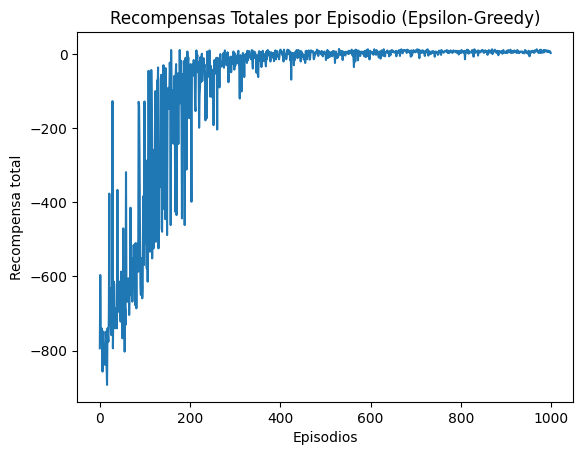

In [17]:
# Graficar las recompensas acumuladas por episodio
plt.plot(rewards_per_episode)
plt.xlabel('Episodios')
plt.ylabel('Recompensa total')
plt.title('Recompensas Totales por Episodio (Epsilon-Greedy)')
plt.show()

In [18]:
listaEstados = []
done = False
truncated = False
G, reward = 0,0
state, _ = env.reset()
firstState = state
pasos = 0
listaEstados.append(state)
print("First State: ", firstState)
while reward != 20 and truncated != True:
        action = np.argmax(Q[state]) #1
        state2, reward, done, truncated, info = env.step(action) #2
        pasos += 1
        # Q[state,action] += alpha * (reward + np.max(Q[state2]) - Q[state,action]) #3
        print('State: ', state)
        print('pasos: ', pasos)
        G += reward
        state = state2  
        listaEstados.append(state) 

First State:  182
State:  182
pasos:  1
State:  162
pasos:  2
State:  262
pasos:  3
State:  242
pasos:  4
State:  222
pasos:  5
State:  202
pasos:  6
State:  102
pasos:  7
State:  2
pasos:  8
State:  18
pasos:  9
State:  118
pasos:  10
State:  218
pasos:  11
State:  318
pasos:  12
State:  418
pasos:  13


In [19]:
for estado in listaEstados:
    env.reset()
    env.unwrapped.s = estado
    decoded_state = decode_taxi_state(estado)
    print(decoded_state)  
    print(env.render())

{'taxi_row': 1, 'taxi_col': 4, 'passenger_location': 0, 'destination': 2}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 1, 'taxi_col': 3, 'passenger_location': 0, 'destination': 2}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 2, 'taxi_col': 3, 'passenger_location': 0, 'destination': 2}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 2, 'taxi_col': 2, 'passenger_location': 0, 'destination': 2}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 2, 'taxi_col': 1, 'passenger_location': 0, 'destination': 2}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 2, 'taxi_col': 0, 'passenger_location': 0, 'destination': 2}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 1, 'taxi_col': 0, 'passenge

### Parámetros del Agente con Selección de Acciones por Intervalo de Confianza Superior (UCB)

- **episodes = 500**: Define el **número total de episodios en el entrenamiento**, es decir, cuántas veces el agente intentará completar la tarea en el entorno.

- **alpha = 0.618**: Establece la **tasa de aprendizaje**. Este parámetro controla cuánto impacto tiene la **nueva información** (recompensa obtenida y valor futuro esperado) sobre el valor Q existente. Un valor más alto permite que el agente aprenda más rápidamente de las **recompensas recientes**.

- **c = 1.0**: Define el **parámetro de exploración para UCB** (Upper Confidence Bound, o Límite Superior de Confianza). Este parámetro controla el grado de **exploración del agente**. 
  - Valores más altos de `c` fomentan **mayor exploración**.
  - Valores más bajos priorizan la **explotación de acciones con altos valores Q**.

- **Q = np.zeros([env.observation_space.n, env.action_space.n])**: Inicializa la **tabla Q con valores de 0**, de tamaño `[número de estados, número de acciones]`. Esta tabla almacenará los **valores Q estimados para cada combinación de estado y acción**.

- **action_counts = np.zeros([env.observation_space.n, env.action_space.n])**: Inicializa una **matriz de conteo de acciones** en ceros, con el mismo tamaño que la tabla Q. Este arreglo mantiene el **conteo de veces que cada acción ha sido tomada en cada estado**, lo cual es esencial para el cálculo del **intervalo de confianza superior en UCB**.
  - Durante el entrenamiento, cada vez que el agente selecciona una acción en un estado determinado, el correspondiente valor en `action_counts` se incrementará en 1.

- **rewards_per_episode = []**: Inicializa una **lista vacía para almacenar la recompensa total obtenida en cada episodio**. Esto permite realizar un **seguimiento del desempeño del agente** a lo largo del tiempo.

### Explicación de la Selección de Acciones con UCB

El **intervalo de confianza superior (UCB)** incentiva al agente a elegir **acciones que no ha explorado mucho o que han mostrado un buen desempeño**. La fórmula de UCB en este contexto se basa en los valores de Q y en la frecuencia de cada acción

#### Este enfoque permite que el agente:

- **Explore acciones** que han sido elegidas pocas veces por que **c** será más grande, incentivando la exploración).
- **Explote acciones con altos valores Q** cuando sean las mejores opciones conocidas hasta el momento.


In [20]:
episodes = 1000  # Número total de episodios de entrenamiento
alpha = 0.618  # Tasa de aprendizaje
c = 1.0  # Parámetro de exploración para UCB
Q = np.zeros([env.observation_space.n, env.action_space.n])  # Tabla Q inicializada en ceros
action_counts = np.zeros([env.observation_space.n, env.action_space.n])  # Conteo de acciones por estado

# Lista para almacenar las recompensas totales por episodio
rewards_per_episode = []

### Elección de Acción con UCB

- **if np.any(action_counts[state] == 0)**: Verifica si existe alguna **acción en el estado actual que aún no ha sido explorada**:
  - **Explora una Acción No Tomada**: Si al menos una acción no ha sido explorada en el estado actual, selecciona la acción menos explorada con `np.argmin(action_counts[state])`.

- **else**: Si todas las acciones han sido **exploradas al menos una vez** en el estado actual:
  - **total_counts = np.sum(action_counts[state])**: Calcula el **total de veces que cualquier acción ha sido tomada** en este estado, lo que se usa para el cálculo de los intervalos de confianza.
  - **confidence_bounds = Q[state] + c * np.sqrt(np.log(total_counts) / action_counts[state])**: Calcula el valor de UCB (Upper Confidence Bound) para cada acción en el estado actual:
    - **Q[state]** es el valor Q actual de cada acción en el estado.
    - **c * np.sqrt(np.log(total_counts) / action_counts[state])** representa el intervalo de confianza, donde `c` controla el grado de exploración. Este término incentiva la exploración de acciones menos frecuentadas.

  - **action = np.argmax(confidence_bounds)**: Selecciona la acción con el valor máximo de UCB, que combina el valor Q y el intervalo de confianza, promoviendo una estrategia de **exploración-explotación balanceada**.

### Ejecución de la Acción y Transición de Estado

- **state2, reward, done, truncated, info = env.step(action)**: Ejecuta la acción seleccionada en el entorno, obteniendo:
  - **state2**: Nuevo estado resultante de la acción.
  - **reward**: Recompensa obtenida tras la acción.
  - **done**: Indica si el episodio se ha completado (si se alcanzó un objetivo final).
  - **truncated**: Indica si el episodio fue truncado por razones externas (límite de tiempo, etc.).
  - **info**: Información adicional del entorno (no utilizada en este contexto).

### Actualización de la Tabla Q

- **Q[state, action] += alpha * (reward + np.max(Q[state2]) - Q[state, action])**: Actualiza el valor Q para el par estado-acción utilizando la **fórmula de Q-learning**:
  - La actualización pondera la **diferencia entre la recompensa obtenida y el valor futuro esperado** (`np.max(Q[state2])`), ajustado por la tasa de aprendizaje `alpha`.


In [21]:
for episode in range(1, episodes + 1):
    done = False
    truncated = False
    G, reward = 0, 0
    state, _ = env.reset()
    pasos = 0

    contadorAccIlegales = 0
    # Bucle de pasos para el episodio actual
    while reward != 20 and not truncated:
        # Selección de acción con UCB
        if np.any(action_counts[state] == 0):
            # Si alguna acción no se ha tomado, elige una acción no explorada
            action = np.argmin(action_counts[state])
        else:
            # UCB: acción que maximiza el valor Q ajustado por el intervalo de confianza
            total_counts = np.sum(action_counts[state])
            confidence_bounds = Q[state] + c * np.sqrt(np.log(total_counts) / action_counts[state])
            action = np.argmax(confidence_bounds)
        
        # Ejecuta la acción en el entorno y observa el nuevo estado y recompensa
        state2, reward, done, truncated, info = env.step(action)
        if reward == -10:
            contadorAccIlegales += 1
        
        # Actualiza la tabla Q con la fórmula de Q-learning
        Q[state, action] += alpha * (reward + np.max(Q[state2]) - Q[state, action])
        
        # Actualizar conteo de acciones y acumular la recompensa
        action_counts[state, action] += 1
        G += reward
        state = state2
        pasos += 1

    # Almacenar la recompensa total del episodio
    rewards_per_episode.append(G)

    # Imprimir la recompensa total en episodios específicos (100, 200, 300, etc.)
    if episode % 1 == 0:
        print(f"Recompensa total en el episodio {episode}: {G} (Acciones ilegales: {contadorAccIlegales})")

Recompensa total en el episodio 1: -596 (Acciones ilegales: 44)
Recompensa total en el episodio 2: -524 (Acciones ilegales: 36)
Recompensa total en el episodio 3: -524 (Acciones ilegales: 36)
Recompensa total en el episodio 4: -578 (Acciones ilegales: 42)
Recompensa total en el episodio 5: -506 (Acciones ilegales: 34)
Recompensa total en el episodio 6: -596 (Acciones ilegales: 44)
Recompensa total en el episodio 7: -524 (Acciones ilegales: 36)
Recompensa total en el episodio 8: -466 (Acciones ilegales: 34)
Recompensa total en el episodio 9: -578 (Acciones ilegales: 42)
Recompensa total en el episodio 10: -479 (Acciones ilegales: 31)
Recompensa total en el episodio 11: -488 (Acciones ilegales: 32)
Recompensa total en el episodio 12: -596 (Acciones ilegales: 44)
Recompensa total en el episodio 13: -425 (Acciones ilegales: 25)
Recompensa total en el episodio 14: -470 (Acciones ilegales: 30)
Recompensa total en el episodio 15: -308 (Acciones ilegales: 12)
Recompensa total en el episodio 16

### Análisis del Método UCB en la Gráfica de Recompensas

El método UCB en esta gráfica muestra que el agente explora intensamente al inicio, lo que resulta en recompensas negativas. Esto es característico de UCB, que incentiva la exploración de acciones menos utilizadas para obtener más información. Gracias a este balance entre exploración y explotación, el agente logra aprender rápidamente, evitando penalizaciones innecesarias a medida que avanza el entrenamiento.

Después de aproximadamente 200-300 episodios, la recompensa total se estabiliza cerca de cero, indicando que el agente ha encontrado una política eficiente para completar la tarea. UCB permite que el agente mantenga una mínima exploración en episodios avanzados mientras explota las acciones con altos valores Q. En general, UCB es efectivo para alcanzar una convergencia rápida y estable hacia una estrategia óptima o cercana a óptima.

### Resumen del Comportamiento de UCB
- **Exploración temprana:** UCB incentiva la exploración inicial de acciones no probadas, permitiendo al agente recopilar información y reducir la incertidumbre.
- **Convergencia estable:** La recompensa se estabiliza cerca de cero después de unos 200-300 episodios, lo que indica una política estable y eficiente.
- **Balance exploración-explotación:** UCB mantiene una mínima exploración en episodios avanzados, evitando que el agente quede atrapado en soluciones subóptimas y permitiéndole explotar las mejores acciones conocidas.

En resumen, el método UCB permite un aprendizaje robusto y estable, ideal para problemas que requieren tanto una convergencia rápida como una política de ejecución confiable y efectiva en el largo plazo.


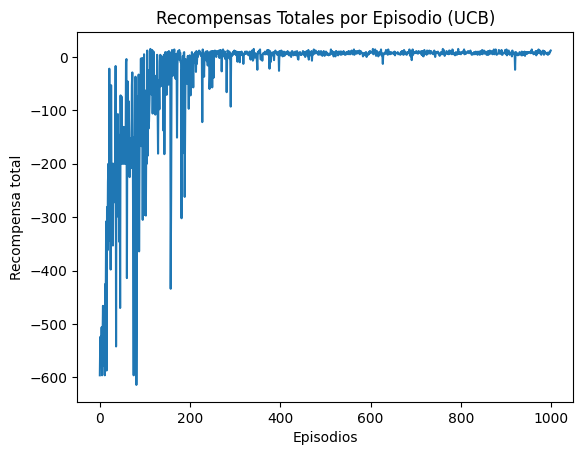

In [22]:
# Graficar las recompensas acumuladas por episodio
plt.plot(rewards_per_episode)
plt.xlabel('Episodios')
plt.ylabel('Recompensa total')
plt.title('Recompensas Totales por Episodio (UCB)')
plt.show()

In [23]:
listaEstados = []
done = False
truncated = False
G, reward = 0,0
state, _ = env.reset()
firstState = state
pasos = 0
listaEstados.append(state)
print("First State: ", firstState)
while reward != 20 and truncated != True:
        action = np.argmax(Q[state]) #1
        state2, reward, done, truncated, info = env.step(action) #2
        pasos += 1
        # Q[state,action] += alpha * (reward + np.max(Q[state2]) - Q[state,action]) #3
        print('State: ', state)
        print('pasos: ', pasos)
        G += reward
        state = state2  
        listaEstados.append(state) 

First State:  66
State:  66
pasos:  1
State:  86
pasos:  2
State:  98
pasos:  3
State:  78
pasos:  4
State:  178
pasos:  5
State:  158
pasos:  6
State:  258
pasos:  7
State:  238
pasos:  8
State:  218
pasos:  9
State:  318
pasos:  10
State:  418
pasos:  11


In [24]:
for estado in listaEstados:
    env.reset()
    env.unwrapped.s = estado
    decoded_state = decode_taxi_state(estado)
    print(decoded_state)  
    print(env.render())

{'taxi_row': 0, 'taxi_col': 3, 'passenger_location': 1, 'destination': 2}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 0, 'taxi_col': 4, 'passenger_location': 1, 'destination': 2}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 0, 'taxi_col': 4, 'passenger_location': 4, 'destination': 2}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 0, 'taxi_col': 3, 'passenger_location': 4, 'destination': 2}
+---------+
|R: | :_:G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 1, 'taxi_col': 3, 'passenger_location': 4, 'destination': 2}
+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 1, 'taxi_col': 2, 'passenger_location': 4, 'destination': 2}
+---------+
|R: | : :G|
| : |_: : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


{'taxi_row': 2, 'taxi_col': 2, 'passenge

# ASCENSO POR GRADIENTE



## Logica del metodo de gradiente
El método de gradiente en aprendizaje por refuerzo es una estrategia en la que el agente aprende a mejorar sus decisiones ajustando directamente la probabilidad de elegir cada acción en función de sus resultados. A diferencia de otros métodos como Q-learning, que buscan aprender el valor esperado de las acciones para decidir cuál es la mejor, el método de gradiente ajusta las "preferencias" hacia cada acción, aumentando la probabilidad de acciones exitosas y reduciendo la de aquellas que han sido menos efectivas.

### Lógica del Método de Gradiente
#### Preferencias y Probabilidades:
 En lugar de una tabla de valores (como en Q-learning), el agente mantiene un vector de preferencias para cada acción. Estas preferencias representan la inclinación del agente hacia cada acción en un momento dado. A partir de estas preferencias, se calcula una probabilidad para cada acción usando la función softmax, que convierte estas preferencias en una distribución de probabilidades. Esto permite que cada acción tenga una probabilidad proporcional a su preferencia, de modo que el agente no elija siempre la misma acción, sino que explore de forma balanceada.

#### Selección de Acción: 
Cada vez que el agente debe tomar una decisión, selecciona una acción según la distribución de probabilidades calculada con softmax. Esto significa que acciones con mayores preferencias tienen más probabilidades de ser seleccionadas, pero todavía hay una posibilidad de que el agente explore acciones menos preferidas. Este balance entre exploración y explotación está integrado en el propio proceso de selección basado en probabilidades.

#### Recompensa y Ajuste de Preferencias: 
Después de tomar una acción y observar la recompensa, el agente ajusta sus preferencias:

 * Si la recompensa obtenida es mayor que la recompensa media acumulada hasta ese punto, se incrementa la preferencia de la acción seleccionada y se reduce la preferencia de las demas acciones. Este aumento es proporcional a la diferencia entre la recompensa obtenida y la recompensa media, y se ajusta por la tasa de aprendizaje (alpha).
 * Por otro lado, si la recompensa es menor que la media, la preferencia por esa acción disminuye y la preferencia de las demas aumenta.
 
### Actualización de Probabilidades: 
Con los ajustes realizados en las preferencias, el agente recalcula las probabilidades para cada acción usando nuevamente la función softmax. De esta forma, la estrategia del agente se ajusta continuamente en función de los resultados obtenidos, aumentando las probabilidades de acciones exitosas y reduciendo las de aquellas menos útiles.

## En el Codigo:

### Función `softmax`
```python
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))
```
Esta función convierte un conjunto de valores (`x`) en una distribución de probabilidad. La función exponencial enfatiza las diferencias entre los valores, y al dividir entre la suma de las exponenciales, se asegura de que la suma de todas las probabilidades sea 1. En este caso, `softmax` se usa para convertir las preferencias de acción (`H`) en probabilidades de selección (`pi`).

### Parámetros y Variables Iniciales
```python
episodes = 1000  # Número total de episodios de entrenamiento
alpha = 0.618  # Tasa de aprendizaje
H = np.zeros([env.action_space.n])  # Preferencias inicializadas en cero
rewards_per_episode = []
```

- `episodes`: Número total de episodios que se ejecutarán.
- `alpha`: La tasa de aprendizaje que determina cuánto se ajustan las preferencias en cada paso.
- `H`: Un vector de preferencias de acción para cada posible acción en el entorno. Inicialmente, todas las preferencias están en cero.
- `rewards_per_episode`: Lista para almacenar las recompensas totales obtenidas en cada episodio.

### Bucle de Entrenamiento Principal
```python
for episode in range(1, episodes + 1):
```
Este bucle recorre todos los episodios. En cada episodio, se ejecuta una secuencia de pasos hasta que el entorno indica que el episodio ha terminado.

#### Reseteo de Variables del Episodio
```python
done = False
truncated = False
G = 0
state, _ = env.reset()
pasos = 0
recompensas = []
```
- `done` y `truncated`: Estas variables de control indican si el episodio ha terminado.
- `G`: Variable para acumular la recompensa total del episodio.
- `state`: El estado inicial del entorno tras el `reset`.
- `recompensas`: Lista para almacenar las recompensas obtenidas en los pasos de este episodio.

#### Inicialización de las Probabilidades
```python
pi = softmax(H)
contadorAcciones = 0
```
Se calculan las probabilidades de seleccionar cada acción usando `softmax` aplicado al vector de preferencias `H`. Estas probabilidades (`pi`) reflejan la preferencia relativa de cada acción. `contadorAcciones` es una variable adicional para contar el número de acciones en el episodio.

### Bucle de Pasos Dentro del Episodio
```python
while not done and not truncated:
```
Este bucle se ejecuta hasta que el episodio termina. En cada iteración, el agente selecciona una acción, observa el resultado y actualiza sus preferencias de acción.

#### Selección de Acción con Softmax
```python
action = np.random.choice(env.action_space.n, p=pi)
contadorAcciones += 1
```
Aquí se selecciona una acción basada en la distribución de probabilidades `pi`, que refleja la probabilidad de escoger cada acción según las preferencias actuales.

#### Ejecución de la Acción y Observación del Resultado
```python
state2, reward, done, truncated, info = env.step(action)
recompensas.append(reward)
```
El agente ejecuta la acción `action` en el entorno (`env.step(action)`) y observa el siguiente estado `state2`, la recompensa `reward`, y si el episodio ha terminado (`done` o `truncated`). La recompensa obtenida se agrega a la lista `recompensas`.

#### Actualización de la Recompensa Acumulada
```python
G += reward
```
La recompensa `reward` se suma a `G`, que mantiene un seguimiento de la recompensa total acumulada en el episodio.

#### Cálculo de la Recompensa Media
```python
recompensa_media = np.mean(recompensas)
```
Se calcula la recompensa media hasta el momento en el episodio. Este valor se usa como referencia para ajustar las preferencias de las acciones, comparando la recompensa actual con esta media.

#### Actualización de las Preferencias (Algoritmo de Gradiente)
```python
for a in range(env.action_space.n):
    if a == action:
        H[a] += alpha * (reward - recompensa_media) * (1 - pi[a])
    else:
        H[a] -= alpha * (reward - recompensa_media) * pi[a]
```
Este es el núcleo del método de gradiente:

- Para la **acción seleccionada** (`a == action`), la preferencia de esa acción se incrementa si la recompensa actual es mayor que la recompensa media y disminuye si es menor. El término `(1 - pi[a])` ajusta la magnitud del cambio en función de la probabilidad de selección de esa acción.
  
- Para las **acciones no seleccionadas**, las preferencias se reducen proporcionalmente a la probabilidad de esa acción (`pi[a]`), reflejando el hecho de que, si la acción tomada fue exitosa (en comparación con la media), se reduce la preferencia de las acciones alternativas.

En general, esto crea un mecanismo de retroalimentación donde las acciones que tienen mejores recompensas tienden a aumentar sus preferencias, y las probabilidades de selección se ajustan en consecuencia.

#### Actualización de las Probabilidades de Selección
```python
pi = softmax(H)
```
Después de actualizar las preferencias, recalculamos `pi` usando `softmax` para reflejar los cambios en las preferencias. Esto asegura que la distribución de probabilidades se ajuste según las nuevas preferencias.

#### Actualización del Estado
El agente actualiza su estado actual a `state2` para el siguiente paso en el bucle.

### Finalización del Episodio
La recompensa total acumulada en el episodio (`G`) se almacena en la lista `rewards_per_episode`.

### Monitoreo del Progreso
Cada 100 episodios, el código imprime la recompensa total obtenida, permitiendo monitorear el progreso del agente.

### Resumen de la Lógica del Método de Gradiente

1. **Preferencias**: En lugar de valores Q, el agente usa un vector de preferencias `H` para cada acción. Estas preferencias determinan la probabilidad de seleccionar cada acción.
   
2. **Softmax**: Se utiliza `softmax` para convertir las preferencias en probabilidades, de forma que acciones con mayores preferencias sean seleccionadas con mayor frecuencia.

3. **Actualización de Preferencias**: Las preferencias de las acciones se ajustan después de cada paso, aumentando para la acción seleccionada si produce una recompensa mayor que la media y disminuyendo en caso contrario. Este ajuste crea un "ascenso por gradiente", donde el agente explora las acciones que le generan mejores recompensas.

4. **Exploración y Explotación**: La selección de acciones se realiza probabilísticamente según `pi`, lo que introduce un balance entre exploración y explotación basado en las probabilidades calculadas.

Este método de gradiente permite que el agente se enfoque en las acciones que han mostrado mayor rendimiento en el pasado, pero también le da la flexibilidad de explorar otras acciones, adaptándose a cambios en el entorno dinámico.

In [25]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

# Parámetros
episodes = 1000  # Número total de episodios de entrenamiento
alpha = 0.618  # Tasa de aprendizaje
H = np.zeros([env.action_space.n])  # Preferencias inicializadas en cero
rewards_per_episode = []

for episode in range(1, episodes + 1):
    done = False
    truncated = False
    G = 0
    state, _ = env.reset()
    pasos = 0
    recompensas = []

    # Inicializa las probabilidades usando softmax
    pi = softmax(H)
    contadorAcciones = 0
    # Bucle de pasos para el episodio actual
    while not done and not truncated:
        # Selección de acción basada en softmax
        action = np.random.choice(env.action_space.n, p=pi)
        contadorAcciones += 1
        
        # Ejecuta la acción en el entorno y observa el nuevo estado y recompensa
        state2, reward, done, truncated, info = env.step(action)
        recompensas.append(reward)
        
        # Acumula la recompensa
        G += reward
        
        # Calcula la recompensa media hasta el momento
        recompensa_media = np.mean(recompensas)
        
        # Actualiza las preferencias de las acciones
        for a in range(env.action_space.n):
            if a == action:
                H[a] += alpha * (reward - recompensa_media) * (1 - pi[a])
            else:
                H[a] -= alpha * (reward - recompensa_media) * pi[a]
        
        # Actualiza las probabilidades usando softmax
        pi = softmax(H)
        
        # Actualiza el estado actual
        state = state2
        pasos += 1

    # Almacenar la recompensa total del episodio
    rewards_per_episode.append(G)

    # Imprimir la recompensa total en episodios específicos (100, 200, 300, etc.)
    if episode % 100 == 0:
        print(f"Recompensa total en el episodio {episode}: {G}")

# El código utiliza las preferencias para ajustar la probabilidad de selección de cada acción,
# logrando así una estrategia de aprendizaje basada en gradiente.


Recompensa total en el episodio 100: -200
Recompensa total en el episodio 200: -200
Recompensa total en el episodio 300: -200
Recompensa total en el episodio 400: -200
Recompensa total en el episodio 500: -200
Recompensa total en el episodio 600: -200
Recompensa total en el episodio 700: -200
Recompensa total en el episodio 800: -200
Recompensa total en el episodio 900: -200
Recompensa total en el episodio 1000: -200


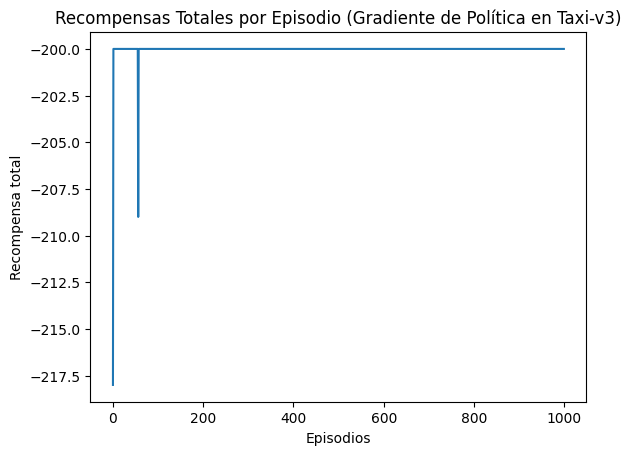

In [26]:
# Graficar las recompensas acumuladas por episodio
plt.plot(rewards_per_episode)
plt.xlabel('Episodios')
plt.ylabel('Recompensa total')
plt.title('Recompensas Totales por Episodio (Gradiente de Política en Taxi-v3)')
plt.show()

In [27]:
print(H)

[ 1.51433035  0.54875983  1.22238717 11.06568091 -5.47228126 -8.87887701]


## ¿Por que no funciona para el taxi?
### 1. Dependencia de Acciones en Secuencia
Para completar la tarea en el entorno Taxi, el agente necesita seguir una secuencia específica de acciones: moverse hacia la ubicación del pasajero, recogerlo, moverse al destino y luego dejarlo. Este tipo de entorno es secuencial, donde las acciones tienen que ejecutarse en un orden específico para alcanzar el objetivo.

El método de gradiente no está diseñado para manejar secuencias de acciones de manera efectiva. Debido a que ajusta las preferencias de cada acción sin considerar el contexto de dónde está el taxi o el pasajero, no puede aprender ni reforzar secuencias de acciones específicas. Esto hace que el método tenga dificultades para entender cómo combinar las acciones "mover", "recoger" y "dejar" de manera útil y ordenada, lo que resulta en un comportamiento casi aleatorio en el entorno Taxi.

### 2. Exploración y Explotación Basada en Probabilidades Globales
El método de gradiente depende de una probabilidad global para cada acción, ajustada únicamente en función de las recompensas obtenidas. En entornos como Taxi, donde el contexto (es decir, el estado específico) determina qué acción es apropiada, esta estrategia de exploración/explotación global no funciona bien.

En el entorno Taxi, las acciones óptimas dependen del estado actual (ubicación del taxi, pasajero y destino), y no se pueden generalizar a través de todas las situaciones. El método de gradiente no puede adaptarse a esta variabilidad contextual, lo que resulta en un rendimiento deficiente.

---
En la siguiente celda realizaremos la implementación del método de gradiente para una sola partida, en donde se mostrara los valores de `reward` `H` y `pi` en cada paso. Asi podremos observar como el agente aprende muy rapido que las acciones como recoger al pasajero y dejarlo son **"malas"** ya que estas dan penalizaciones de -10 cuando se hace en el momento incorrecto. Por lo que pronto el agente aprendera a no hacer estas acciones y terminara optando por moverse hasta que termine el juego, lo que le lleva a nunca ganar.

In [28]:
import numpy as np

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

# Parámetros
episodes = 1  # Número total de episodios de entrenamiento
alpha = 0.618  # Tasa de aprendizaje
H = np.zeros([env.action_space.n])  # Preferencias inicializadas en cero
rewards_per_episode = []

for episode in range(1, episodes + 1):
    done = False
    truncated = False
    G = 0
    state, _ = env.reset()
    pasos = 0
    recompensas = []

    # Inicializa las probabilidades usando softmax
    pi = softmax(H)
    contadorAcciones = 0
    # Bucle de pasos para el episodio actual
    while not done and not truncated:
        # Selección de acción basada en softmax
        action = np.random.choice(env.action_space.n, p=pi)
        contadorAcciones += 1
        
        # Ejecuta la acción en el entorno y observa el nuevo estado y recompensa
        state2, reward, done, truncated, info = env.step(action)
        # if reward == -1:
        #     reward = 10
        # if reward == -10:
        #     reward = 1
        # if reward == 20:
        #     reward = 100000000
        recompensas.append(reward)
        
        # Acumula la recompensa
        G += reward
        #print(f"recompensa accion {contadorAcciones}: {reward} -- H: {H} -- pi: {pi}")
        
        # Calcula la recompensa media hasta el momento
        recompensa_media = np.mean(recompensas)
        
        # Actualiza las preferencias de las acciones
        for a in range(env.action_space.n):
            if a == action:
                H[a] += alpha * (reward - recompensa_media) * (1 - pi[a])
            else:
                H[a] -= alpha * (reward - recompensa_media) * pi[a]
        
        # Actualiza las probabilidades usando softmax
        pi = softmax(H)

        print(f"recompensa accion {contadorAcciones}: {reward} -- H: {H} -- pi: {pi}")
        
        # Actualiza el estado actual
        state = state2
        pasos += 1

    # Almacenar la recompensa total del episodio
    rewards_per_episode.append(G)

    # Imprimir la recompensa total en episodios específicos (100, 200, 300, etc.)
    if episode % 100 == 0:
        print(f"Recompensa total en el episodio {episode}: {G}")

# El código utiliza las preferencias para ajustar la probabilidad de selección de cada acción,
# logrando así una estrategia de aprendizaje basada en gradiente.


recompensa accion 1: -1 -- H: [0. 0. 0. 0. 0. 0.] -- pi: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
recompensa accion 2: -1 -- H: [0. 0. 0. 0. 0. 0.] -- pi: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
recompensa accion 3: -1 -- H: [0. 0. 0. 0. 0. 0.] -- pi: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
recompensa accion 4: -1 -- H: [0. 0. 0. 0. 0. 0.] -- pi: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
recompensa accion 5: -1 -- H: [0. 0. 0. 0. 0. 0.] -- pi: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
recompensa accion 6: -1 -- H: [0. 0. 0. 0. 0. 0.] -- pi: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
recompensa accion 7: -1 -- H: [0. 0. 0. 0. 0. 0.] -- pi: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
recompensa accion 8: -1 -- H: [0. 0. 0. 0. 0. 0.] -- pi: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


### Primeras Acciones:
Para las primeras acciones, recibes una recompensa de -1. Como no hay recompensas anteriores para calcular una media significativa, la recompensa_media es también -1 (es el único valor en recompensas hasta ese punto).
El ajuste de H depende de la expresión (reward - recompensa_media). En este caso, reward y recompensa_media son ambos -1, por lo que (reward - recompensa_media) = 0.
Al tener este valor de 0, el término de ajuste para H se vuelve cero, y por lo tanto, no se realizan cambios en las preferencias para estas primeras dos acciones. Esto explica por qué H y pi permanecen constantes.

### Acciones Posteriores:

Una vez que ya obtiene una recompensa diferente ya empieza a actualizar las preferencias, ya que la media ya va cambiar y por lo tanto el valor de (reward - recompensa_media) sera diferente de 0.

A partir de este punto el agente le ira reduciendo la preferencia a las acciones de recoger y dejar al pasajero, ya que estas acciones le dan una penalizacion de -10 (que es mucho menor a la recompensa de -1 por moverse a cualquier direccion), por lo que el agente pronto aprendera a no hacer estas acciones y optara por moverse hasta que termine el juego.